LABORATORIO FINAL AUTO 1 

Maria José Rodriguez
Maria José Bedoya Carmona 
Karen Olarte


Primera Parte 
1. CONSULTAR LA IMPLEMENTACION DEL REGRESOR LINEAL CON SKLEARN

La regresión lineal es un algoritmo de aprendizaje automático basado en aprendizaje supervizado, realiza una tarea de regresión, permite modelar un valor de predicción objetivo basado en variables independientes. Se utiliza principalmente para determinar la relación entre variables y pronosticos. 

Implementar la regresión lineal con Sklearn permite aprender matemáticamente una línea que mejor se ajusta a los datos y usarla para predecir valores futuros. 
 
1. Importar las bibliotecas necesarias 
2. Cargar la base de datos 
3. Exploración de la dispersión de datos 
4. Limpieza de datos 
5. Entrenamiento del modelo de regresión líneal 
6. Explorar resultados
7. Trabajar con un conjunto de datos mas pequeño
8. Métricas de evaluación para la regresión 

2. IMPLEMENTAR LA REGRESIÓN LINAL DEL PROBLEMA VISTO EN CLASE CON SKLEARN 

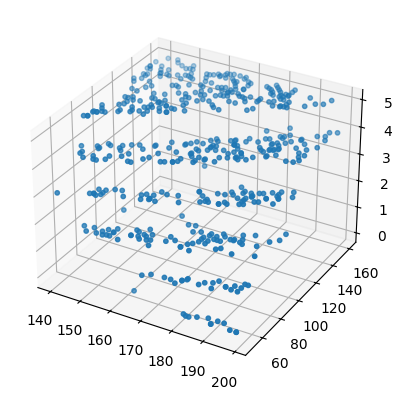

In [191]:
#Importar bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split #Separar datos en train_test
from sklearn.preprocessing import StandardScaler     #Estandarizar(normalizar variables)
from sklearn.linear_model import SGDRegressor        #Modelo de regresión que aprende con descenso de gradiente:
                                                     #Aprende de los datos reales y se corrige poco a poco para 
                                                     #mejorar la respuesta del modelo
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error      #Métricas de evaluación del modelo
import matplotlib.pyplot as plt

#Cargar la base de datos
df = pd.read_csv("bmi.csv")

#Exploración de datos 

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')           #111:Una sola figura, 1 fila, 1 columna, 1 gráfico
ax.scatter(df['Height'], df['Weight'], df['Index'], s=10, c=None, depthshade=True)  #ax.scatter(...): Dibuja los puntos del gráfico 3D (uno por cada fila 
                                                                                    #de la base de datos).

In [192]:
df.info() 
df.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [193]:
#Limpieza de datos
df=pd.get_dummies(df, columns=['Gender'],drop_first=True, dtype=int)    #Convierte la columna "Gender" en variables númericas: 0 y 1
                                                                        #get_dummies crea variables dummy (es decir, convierte texto a números).
                                                                        #drop_first=True Evita la columna doble
df

,Height,Weight,Index,Gender_Male
0,174,96,4,1
1,189,87,2,1
2,185,110,4,0
3,195,104,3,0
4,149,61,3,1
...,...,...,...,...
495,150,153,5,0
496,184,121,4,0
497,141,136,5,0
498,150,95,5,1


In [ ]:
# Separar variables X(predictorias) y salida    y(objetivo)
#X = altura, peso y género         y= Índice de salud (0-5)
X =  df[['Height', 'Weight', 'Gender_Male']].values  
y = df['Index'].values
# Determinar datos de entrenamiento (60%), validación(20%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
#Normalización de datos para que todas las variables estén en la misma escala y permitir que el algoritmo aprenda mejor
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)   #Ajusta y transforma datos de entrenamiento
X_test_s = scaler.transform(X_test)         #solo transforma los datos de prueba 

#Entrenamiento SGDRegressor por epochs (Descenso de gradiente estocástico)
#El algoritmo aprende poco a poco ajustando pesos y bias por epoch
sgd = SGDRegressor(
    loss='squared_error',              #Fución de costo a minimizar (MSE)
    learning_rate='invscaling',        #Tasa de aprendizaje que va disminuyendo con el tiempo
    eta0=0.01,                         #Valor inicial de learning rate
    max_iter=1,                        #1 iteración por cada epoch
    warm_start=True,                   #Mantiene lo aprendido en cada epoch
    random_state=42
)

costos= []      #Se guardan los costos por epoch
pesos=[]        #Se guardad los pesos (w) por epoch
bias=[]         #Guarda el bias (b) aprendido en cada epoch
epochs = 300    # cantidad de iteraciones manuales (entrenamiento gradual)

#Ciclo de entrenamiento
for i in range(epochs):
    sgd.fit(X_train_s, y_train)                #El modelo aprende ajustando los pesos y bias para que las predicciones se parezcan cada vez más a los valores reales.
                                               #Durante el entrenamiento (fit()), el modelo va cambiando los valores de esos pesos para que la fórmula 
                                               # se acerque lo más posible a la realidad.
    
    #Predicción sobre los datos de entrenamiento(usa lo aprendido)
    pred_train = sgd.predict(X_train_s)

    #Calculo de error cuadrático medio(costo)
    error_mse = mean_squared_error(y_train, pred_train)
    costos.append(error_mse)                            

     # Obtención de los pesos y bias actuales del modelo
    pesos.append(sgd.coef_)                               #Pesos (w) en el epoch y se guardan en la lista
    bias.append(sgd.intercept_)                           #Bias (B) aprendidos en el epoch

c:\Users\Maria José Bedoya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Maria José Bedoya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Maria José Bedoya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Maria José Bedoya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1579: ConvergenceWarning: Maximum nu

3.REPORTE LOS PESOS W, EL BIAS Y EL LOS COSTOS (DEBERIAN DISMINUIR A MEDIDA DE QUE LAS EPOCHS AUMENTA)

In [ ]:
print("DESCENSO DEL COSTO (MSE) POR EPOCH:\n")
for i, costo in enumerate(costos):                            #costos guarda el error (MSE) que tiene el modelo en cada epoch.
                                                              #enumerate(costos) permite recorrer la lista y también saber en qué epoch estamos.
                                                              
    print(f"Epoch {i+1} _ Costo (MSE): {costo:.4f}")


print("\nBias final (b):")  #sgd.intercept Bias (b):Es el valor que el modelo aprende para desplazar la recta (o plano) de predicción.
                            #Representa el punto donde intercepta el eje y, cuando todas las entradas son cero.
print(sgd.intercept_)

print("Pesos finales (W):") #sgd.coef Pesos (W):Son los valores que el modelo aprendió para cada variable: Height, Weight y Gender_Male.
                            #Indican qué tan importante es cada característica para hacer la predicción.
print(sgd.coef_)

DESCENSO DEL COSTO (MSE) POR EPOCH:

Epoch 1 _ Costo (MSE): 1.7278
Epoch 2 _ Costo (MSE): 0.4450
Epoch 3 _ Costo (MSE): 0.3273
Epoch 4 _ Costo (MSE): 0.3163
Epoch 5 _ Costo (MSE): 0.3153
Epoch 6 _ Costo (MSE): 0.3152
Epoch 7 _ Costo (MSE): 0.3152
Epoch 8 _ Costo (MSE): 0.3152
Epoch 9 _ Costo (MSE): 0.3152
Epoch 10 _ Costo (MSE): 0.3152
Epoch 11 _ Costo (MSE): 0.3152
Epoch 12 _ Costo (MSE): 0.3152
Epoch 13 _ Costo (MSE): 0.3152
Epoch 14 _ Costo (MSE): 0.3152
Epoch 15 _ Costo (MSE): 0.3152
Epoch 16 _ Costo (MSE): 0.3152
Epoch 17 _ Costo (MSE): 0.3152
Epoch 18 _ Costo (MSE): 0.3152
Epoch 19 _ Costo (MSE): 0.3152
Epoch 20 _ Costo (MSE): 0.3152
Epoch 21 _ Costo (MSE): 0.3152
Epoch 22 _ Costo (MSE): 0.3152
Epoch 23 _ Costo (MSE): 0.3152
Epoch 24 _ Costo (MSE): 0.3152
Epoch 25 _ Costo (MSE): 0.3152
Epoch 26 _ Costo (MSE): 0.3152
Epoch 27 _ Costo (MSE): 0.3152
Epoch 28 _ Costo (MSE): 0.3152
Epoch 29 _ Costo (MSE): 0.3152
Epoch 30 _ Costo (MSE): 0.3152
Epoch 31 _ Costo (MSE): 0.3152
Epoch 32 _ 

4. GRAFIQUE LOS COSTOS VS LAS EPOCHS

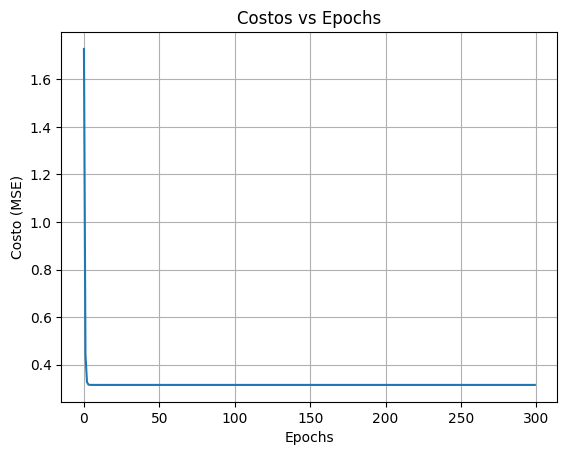

In [196]:

plt.plot(range(len(costos)), costos)
plt.title("Costos vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Costo (MSE)")
plt.grid(True)
plt.show()



5. PRESENTE LAS METRICAS DE REGRESION CON SU RESPECTIVA INTERPRETACION (R2, MSE, MAE...Y LAS QUE ESTAN ESPECIFICADAS EN EL NOTEBOOK)

In [ ]:
#Predicciones finales del modelo 
y_pred = sgd.predict(X_test_s)   #Usa el modelo ya entrenado (sgd) para predecir los valores de salida.
                                 #Usa datos de prueba normalizados (X_test_s).
                                 #El modelo genera una predicción llamada y_pred, que son los valores estimados para Index.

#Métricas: 
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

#Coeficiente de correlación de Pearson (r)
r = np.corrcoef(y_test, y_pred)[0, 1]

print(f"R2 Score: {r2:.4f}")
print(f"MSE (Error cuadrático medio): {mse:.4f}")
print(f"MAE (Error absoluto medio): {mae:.4f}")
print(f"Coef. de correlación de Pearson (r): {r:.4f}")

R2 Score: 0.7981
MSE (Error cuadrático medio): 0.3364
MAE (Error absoluto medio): 0.4675
Coef. de correlación de Pearson (r): 0.9002


Interpretación de métricas: 

R^2: es una medida de la proporción de la variabilidad en los datos que es explicada por el modelo. 
R² varía entre 0 y 1, siendo 1 un ajuste perfecto. 
Para este caso R² de 0.7981 explica el 79.8% de la variabilidad de los datos reales, evidenciando un buen rendimiento
general con margen de mejora. 

MSE (Error cuadrático medio): calcula el promedio de los errores al cuadrado entre los valores predichos y reales del modelo. Un MSE de 0.3364 indica que los errores del modelo no son muy grandes, es decir, el modelo aprende bien y las predicciones están cerca de los valores reales. 

MAE (Error absoluto medio): mide la diferencia media absoluta entre los valores observados y los predichos por el modelo. Representa cuanto se equivoca el modelo en promedio por cada predicción
Para este caso, el modelo tiene un error absoluto medio de 0.4675, lo que quiere decir que en cada predicción se equivoca en menos de una unidad. Esto es un error bajo para la  variable objetivo que comprende un rango de 0 a 5.

Coef. de correlación de Pearson (r): mide la relación lineal entre las variables de entrada y la variable de salida, mientras más cercano a 1, mayor correlación (relación lineal entre lo real y lo predicho). Una correlación de 0.90 demuestra que el modelo captura muy bien la tendencia general de los datos. 

6.SIMULE UNA MUESTRA NUEVA (COMO SI FUESE UN PACIENTE NUEVO) Y HAGA LA PREDICCION CON EL ALGORITMO ENTRENADO



In [198]:
#Paciente simulado 
sim_paciente=np.array([[167, 58, 0]])
# 2. Escalar la muestra usando el mismo StandardScaler
sim_paciente = scaler.transform(sim_paciente)
# 3. Hacer la predicción con el modelo entrenado
prediccion = sgd.predict(sim_paciente)

print("Predicción para el nuevo paciente:")
print(f"{prediccion[0]:.2f}")

Predicción para el nuevo paciente:
2.18


Interpretación: según el modelo, el paciente presenta un estado de salud normal, lo cual indica que el paciente se encuentra dentro de un ranfo saludable de acuerdo a su IMC. 